In [1]:
# Install datasets Library
! pip install datasets

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df.job_posted_date)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [3]:
job_counts=df.job_title_short.value_counts()

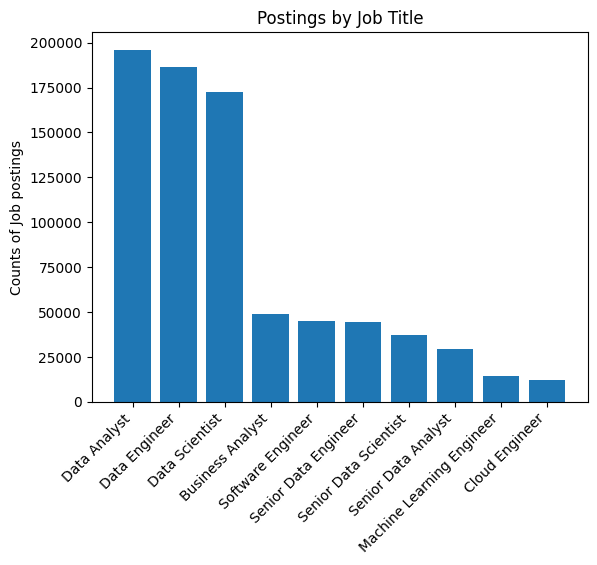

In [11]:
plt.bar(job_counts.index, job_counts.values)
plt.title('Postings by Job Title')
plt.ylabel('Counts of Job postings')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='job_title_short'>

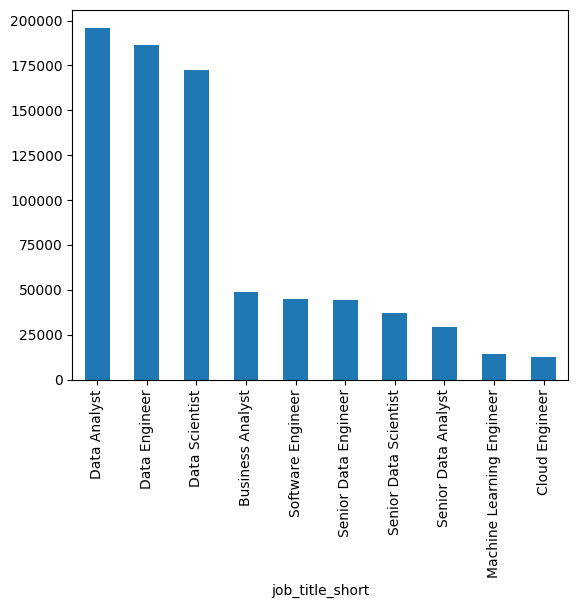

In [12]:
job_counts.plot(kind='bar')

In [13]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

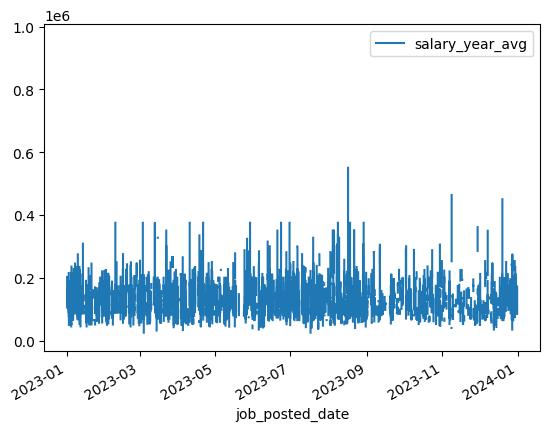

In [14]:
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

#Exercise

In [18]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

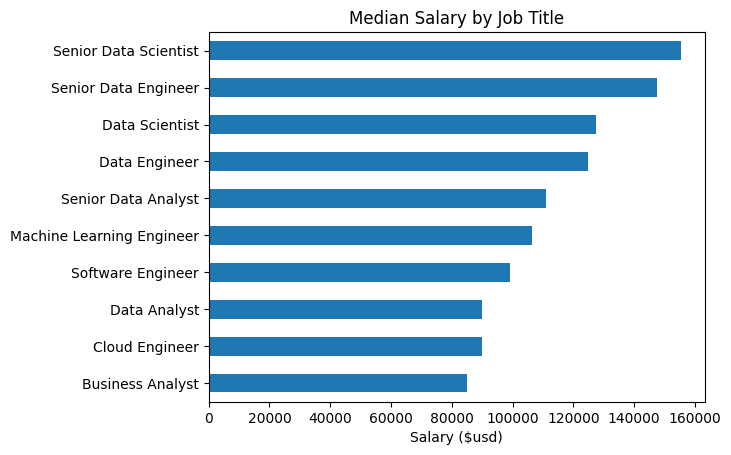

In [19]:
job_salary.plot(kind ='barh')
plt.xlabel('Salary ($usd)')
plt.ylabel('')
plt.title('Median Salary by Job Title')
plt.show()
